In [1]:
import numpy as np
from scipy.spatial.transform import Rotation as R
from matplotlib import pyplot as plt
plt.rcParams['figure.dpi']= 100
# plt.rcParams['text.usetex'] = True

pgf_with_latex = {                      # setup matplotlib to use latex for output
    "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
    "text.usetex": True,                # use LaTeX to write all text
    "font.family": "serif",
    "font.serif": [],                   # blank entries should cause plots 
    "font.sans-serif": [],              # to inherit fonts from the document
    "font.monospace": [],
    "axes.labelsize": 10,               # LaTeX default is 10pt font.
    "font.size": 10,
    "legend.fontsize": 8,               # Make the legend/label fonts 
    "xtick.labelsize": 8,               # a little smaller
    "ytick.labelsize": 8,
#     "figure.figsize": figsize(0.9),     # default fig size of 0.9 textwidth
#     "pgf.preamble": "\n".join([ # plots will use this preamble
#         r"\usepackage[utf8]{inputenc}",
#         r"\usepackage[T1]{fontenc}",
#         r"\usepackage[detect-all,locale=DE]{siunitx}",
#         ])
    }
plt.rcParams.update(pgf_with_latex)

# Haptic switch

In [29]:
with open('./data/switch/switch_13dec_00_17_sc5_tk3', 'rb') as f:
    clean_lines = (line.replace(b',',b'').replace(b'[',b'').replace(b']',b'') for line in f)
#     data = np.genfromtxt(clean_lines, dtype=float, delimiter=None, skip_header=2)
    data = np.genfromtxt(clean_lines, dtype=float, delimiter=None, skip_header=2, skip_footer=2600)
    
n_rows, n_cols = np.shape(data)
time = data[:,0]
time -= min(time)
haptic_pos = data[:,1:4]
haptic_gripper = data[:,4]
haptic_ori = np.zeros((n_rows,3,3))
haptic_control_on = data[:,14]
ee_ori = np.zeros((n_rows,3,3))
ee_pos = data[:,24:27]
ee_pose_num_des = data[:,27]

for i in range(n_rows):
    haptic_ori[i] = np.vstack((data[i,5:8], data[i,8:11], data[i,11:14]))
    ee_ori[i] = np.vstack((data[i,15:18], data[i,18:21], data[i,21:24]))

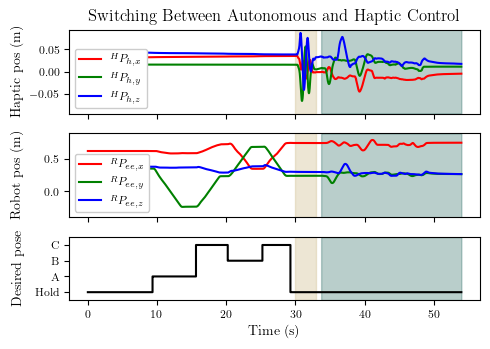

In [40]:
n_plots = 3
fig, axs = plt.subplots(n_plots, 1, sharex=True, figsize=(5,3.2),
                       gridspec_kw={'height_ratios': [1, 1, 0.75]})

# color x,y,z as rgb with labels
color_list = ['r', 'g', 'b']
haptic_labels = [r'$^{H} P_{h,x}$',
                 r'$^{H} P_{h,y}$',
                 r'$^{H} P_{h,z}$']
robot_labels = [r'$^{R} P_{ee,x}$',
                r'$^{R} P_{ee,y}$',
                r'$^{R} P_{ee,z}$']
for i, color in enumerate(color_list):
    axs[0].plot(time, haptic_pos[:,i], color=color, label=haptic_labels[i])
    axs[1].plot(time, ee_pos[:,i], color=color, label=robot_labels[i])
    
# make step plots for integer data
on_ind = np.asarray(haptic_control_on == 1).nonzero()
# axs[0].step(time, haptic_control_on, 'k')
axs[2].step(time, ee_pose_num_des, 'k')
# axs[0].step(time[on_ind], haptic_control_on[on_ind], 'm')
# axs[2].step(time[on_ind], ee_pose_num_des[on_ind], 'm')

# set integer data y-labels
# axs_indices = [0, 3]
# y_ticks = [[0, 1], [0, 1, 2, 3]]
# y_tick_labels = [["Off", "On"], ["Hold", "A", "B", "C"]]
axs_indices = [2]
y_ticks = [[0, 1, 2, 3]]
y_tick_labels = [["Hold", "A", "B", "C"]]
for i, axs_index in enumerate(axs_indices):
    axs[axs_index].set_yticks(y_ticks[i])
    axs[axs_index].set_yticklabels(y_tick_labels[i])

x_positions = [30, 33]
# y_labels = ["Haptic control", "Haptic position (m)", "Robot position (m)", "Desired pose"]
y_labels = ["Haptic pos (m)", "Robot pos (m)", "Desired pose"]
y_lims = [(-0.095, 0.095), (-0.4, 0.9), (-0.5, 3.5)]
for i in range(n_plots):
    axs[i].set_ylabel(y_labels[i])

    # highlight haptic control on area
#     ymin, ymax = axs[i].get_ylim()
    ymin, ymax = y_lims[i]
    axs[i].set_ylim((ymin,ymax))
    axs[i].fill_between(time, ymin, ymax, where=(haptic_control_on==1),
                   alpha=0.3, color='#175e54ff')
    
    # add vertical lines
    #53284f for alternate to cyan
#     for x_position in x_positions:
#         axs[i].axvline(x=x_position, color='#53284f', linestyle='--')
    axs[i].fill_between(time, ymin, ymax, where=((time>=x_positions[0]) & (time<=x_positions[1])),
                   alpha=0.4, color='#d2c295ff')
        
#     axs[i].text(40.5, ymin + (ymax-ymin)/6, 'Haptic control on')

# axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
# axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[0].legend(loc='lower left', framealpha=1)
axs[1].legend(loc='lower left', framealpha=1)
    
fig.align_ylabels()
fig.tight_layout()

axs[0].set_title("Switching Between Autonomous and Haptic Control")
plt.xlabel("Time (s)")

plt.savefig('./data/plots/haptic_auto_switch.svg', format='svg', dpi=1200)
plt.show()

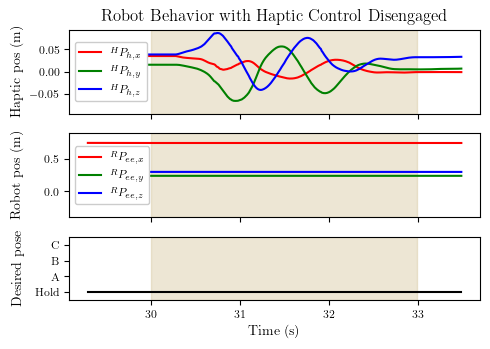

In [39]:
n_plots = 3
fig, axs = plt.subplots(n_plots, 1, sharex=True, figsize=(5,3.2),
                       gridspec_kw={'height_ratios': [1, 1, 0.75]})

# find time region of interest
clipped_ind = np.asarray((time>=29.29) & (time<=33.5)).nonzero()

# color x,y,z as rgb with labels
color_list = ['r', 'g', 'b']
haptic_labels = [r'$^{H} P_{h,x}$',
                 r'$^{H} P_{h,y}$',
                 r'$^{H} P_{h,z}$']
robot_labels = [r'$^{R} P_{ee,x}$',
                r'$^{R} P_{ee,y}$',
                r'$^{R} P_{ee,z}$']
for i, color in enumerate(color_list):
    axs[0].plot(time[clipped_ind], haptic_pos[:,i][clipped_ind], color=color, label=haptic_labels[i])
    axs[1].plot(time[clipped_ind], ee_pos[:,i][clipped_ind], color=color, label=robot_labels[i])
    
# make step plots for integer data
# axs[0].step(time[clipped_ind], haptic_control_on[clipped_ind], 'k')
axs[2].step(time[clipped_ind], ee_pose_num_des[clipped_ind], 'k')

# set integer data y-labels
# axs_indices = [0, 3]
# y_ticks = [[0, 1], [0, 1, 2, 3]]
# y_tick_labels = [["Off", "On"], ["Hold", "A", "B", "C"]]
axs_indices = [2]
y_ticks = [[0, 1, 2, 3]]
y_tick_labels = [["Hold", "A", "B", "C"]]
for i, axs_index in enumerate(axs_indices):
    axs[axs_index].set_yticks(y_ticks[i])
    axs[axs_index].set_yticklabels(y_tick_labels[i])

# set vertical lines and all y-labels
x_positions = [30, 33]
# y_labels = ["Haptic control", "Haptic position (m)", "Robot position (m)", "Desired pose"]
y_labels = ["Haptic pos (m)", "Robot pos (m)", "Desired pose"]
y_lims = [(-0.095, 0.095), (-0.4, 0.9), (-0.5, 3.5)]
for i in range(n_plots):
    axs[i].set_ylabel(y_labels[i])
    
    # highlight haptic control on area
#     ymin, ymax = axs[i].get_ylim()
    ymin, ymax = y_lims[i]
    axs[i].set_ylim((ymin,ymax))
    axs[i].fill_between(time[clipped_ind], ymin, ymax, where=(haptic_control_on[clipped_ind]==1),
                   alpha=0.3, color='#175e54ff')
    
    # add vertical lines
    #53284f for alternate to cyan
#     for x_position in x_positions:
#         axs[i].axvline(x=x_position, color='#53284f', linestyle='--')
    axs[i].fill_between(time, ymin, ymax, where=((time>=x_positions[0]) & (time<=x_positions[1])),
                   alpha=0.4, color='#d2c295ff')
        
axs[0].legend(loc='center left', framealpha=1)
axs[1].legend(loc='center left', framealpha=1)

fig.align_ylabels()
fig.tight_layout()

axs[0].set_title("Robot Behavior with Haptic Control Disengaged")
plt.xlabel("Time (s)")

plt.savefig('./data/plots/haptic_clutch.svg', format='svg', dpi=1200)
plt.show()

# Lightbulb

PLOT MOMENT AND ANGULAR VELOCITY FOR SCENE 6 TAKE 5

In [5]:
with open('./data/lightbulb/lightbulb_13dec_17_40_sc6_tk5', 'rb') as f:
    clean_lines = (line.replace(b',',b'').replace(b'[',b'').replace(b']',b'') for line in f)
    data = np.genfromtxt(clean_lines, dtype=float, delimiter=None, skip_header=4500, skip_footer=45500)
#     data = np.genfromtxt(clean_lines, dtype=float, delimiter=None, skip_header=2)
    
n_rows, n_cols = np.shape(data)
time = data[:,0]
time -= min(time)
haptic_pos = data[:,1:4]
haptic_gripper = data[:,4]
haptic_ori = np.zeros((n_rows,3,3))
haptic_control_on = data[:,14]
ee_force = data[:,15:18]
ee_moment = data[:,18:21]
ee_ori = np.zeros((n_rows,3,3))
ee_pos = data[:,30:33]
ee_pose_num_des = data[:,33]

ee_omega = np.zeros((n_rows,3))
ee_vel = np.zeros((n_rows,3))

for i in range(n_rows):
    haptic_ori[i] = np.vstack((data[i,5:8], data[i,8:11], data[i,11:14]))
    ee_ori[i] = np.vstack((data[i,21:24], data[i,24:27], data[i,27:30]))
    
    # compute ee linear and angular velocities
    if i == 0:
        dR = (ee_ori[1] - ee_ori[0]) / (time[1] - time[0])
        ee_vel[0] = (ee_pos[1] - ee_pos[0]) / (time[1] - time[0])
    elif i == n_rows - 1:
        dR = (ee_ori[-1] - ee_ori[-2]) / (time[-1] - time[-2])
        ee_vel[-1] = (ee_pos[-1] - ee_pos[-2]) / (time[-1] - time[-2])
    else:
        dR = (ee_ori[i+1] - ee_ori[i-1]) / (time[i+1] - time[i-1])
        ee_vel[i] = (ee_pos[i+1] - ee_pos[i-1]) / (time[i+1] - time[i-1])
    
    skew_angularvelocity = ee_ori[i].transpose().dot(dR)
    ee_omega[i,0] = skew_angularvelocity[2,1]
    ee_omega[i,1] = skew_angularvelocity[0,2]
    ee_omega[i,2] = skew_angularvelocity[1,0]

In [6]:
fig, axs = plt.subplots(3, 1)
color_list = ['r', 'g', 'b']
for i, color in enumerate(color_list):
    axs[1].plot(time, haptic_pos[:,i], color=color)
    axs[2].plot(time, ee_pos[:,i], color=color)
axs[0].step(time, haptic_control_on, 'k')

fig.tight_layout()
# plt.show()

plt.close()

In [7]:
color_list = ['r', 'g', 'b']
for i, color in enumerate(color_list):
    plt.plot(time, ee_pos[:,i] - ee_pos[-1,i], color=color)

fig.tight_layout()
# plt.show()

plt.close()

In [8]:
fig, axs = plt.subplots(2, 1)
color_list = ['r', 'g', 'b']
for i, color in enumerate(color_list):
    axs[0].plot(time, ee_force[:,i], color=color)
    axs[1].plot(time, ee_moment[:,i], color=color)

fig.tight_layout()
# plt.show()

plt.close()

In [9]:
fig, axs = plt.subplots(3, 1)
color_list = ['r', 'g', 'b']
for i, color in enumerate(color_list):
    axs[0].plot(time, ee_pos[:,i], color=color)
    axs[1].plot(time, ee_vel[:,i], color=color)
    axs[2].plot(time, ee_omega[:,i], color=color)

fig.tight_layout()
# plt.show()

plt.close()

# Optitrack 2 arms

free space motion

use world urdf pandaapps to get table positions for robot -- plot orientation error

In [10]:
with open('./data/optitrack_2arm/optitrack_2arm_12dec_20_55_sc2_tk3', 'rb') as f:
    clean_lines = (line.replace(b',',b'').replace(b'[',b'').replace(b']',b'') for line in f)
#     data = np.genfromtxt(clean_lines, dtype=float, delimiter=None, skip_header=4000)
    data = np.genfromtxt(clean_lines, dtype=float, delimiter=None, skip_header=5052)
    
n_rows, n_cols = np.shape(data)
time = data[:,0]
time -= min(time)
lead_ori = np.zeros((n_rows,3,3))
lead_pos = data[:,10:13]
support_ori = np.zeros((n_rows,3,3))
support_pos = data[:,22:25]
bottle_ori = data[:,25:29]
bottle_pos = data[:,29:32]

# bottle_ori[:,0], bottle_ori[:,3] = bottle_ori[:,3], bottle_ori[:,0]

lead_omega = np.zeros((n_rows,3))
lead_vel = np.zeros((n_rows,3))
support_omega = np.zeros((n_rows,3))
support_vel = np.zeros((n_rows,3))

for i in range(n_rows):
    lead_ori[i] = np.vstack((data[i,1:4], data[i,4:7], data[i,7:10]))
    support_ori[i] = np.vstack((data[i,13:16], data[i,16:19], data[i,19:22]))
    
    # compute ee linear and angular velocities
    if i == 0:
        lead_dR = (lead_ori[1] - lead_ori[0]) / (time[1] - time[0])
        lead_vel[0] = (lead_pos[1] - lead_pos[0]) / (time[1] - time[0])
        support_dR = (support_ori[1] - support_ori[0]) / (time[1] - time[0])
        support_vel[0] = (support_pos[1] - support_pos[0]) / (time[1] - time[0])
    elif i == n_rows - 1:
        lead_dR = (lead_ori[-1] - lead_ori[-2]) / (time[-1] - time[-2])
        lead_vel[-1] = (lead_pos[-1] - lead_pos[-2]) / (time[-1] - time[-2])
        support_dR = (support_ori[-1] - support_ori[-2]) / (time[-1] - time[-2])
        support_vel[-1] = (support_pos[-1] - support_pos[-2]) / (time[-1] - time[-2])
    else:
        lead_dR = (lead_ori[i+1] - lead_ori[i-1]) / (time[i+1] - time[i-1])
        lead_vel[i] = (lead_pos[i+1] - lead_pos[i-1]) / (time[i+1] - time[i-1])
        support_dR = (support_ori[i+1] - support_ori[i-1]) / (time[i+1] - time[i-1])
        support_vel[i] = (support_pos[i+1] - support_pos[i-1]) / (time[i+1] - time[i-1])
        
    lead_skew_angularvelocity = lead_ori[i].transpose().dot(lead_dR)
    lead_omega[i,0] = lead_skew_angularvelocity[2,1]
    lead_omega[i,1] = lead_skew_angularvelocity[0,2]
    lead_omega[i,2] = lead_skew_angularvelocity[1,0]
    
    support_skew_angularvelocity = support_ori[i].transpose().dot(support_dR)
    support_omega[i,0] = support_skew_angularvelocity[2,1]
    support_omega[i,1] = support_skew_angularvelocity[0,2]
    support_omega[i,2] = support_skew_angularvelocity[1,0]

In [11]:
# rotate data to support robot frame
optitrack_support_angle = np.deg2rad(62.5)
c = np.cos(optitrack_support_angle)
s = np.sin(optitrack_support_angle)
R_optitrack_in_support_frame = R.from_matrix([
    [s, 0, -c],
    [-c, 0, -s],
    [0, 1, 0]
])
pos_support_ref_in_optitrack_frame = np.array([-0.508397, 0.847871, 0.313138])
pos_support_ref_in_support_frame = np.array([0.048436, 0.275109, 0.922579])
# bottle_origin_in_support_ee_frame = np.array([0.131569, -0.00721577, 0.161644])

# R_optitrack_in_support_frame = R.from_euler('x', 90, degrees=True) * R.from_euler('y', -107.5, degrees=True)
bottle_pos_in_support_frame = R_optitrack_in_support_frame.apply(bottle_pos - pos_support_ref_in_optitrack_frame)
bottle_pos_in_support_frame += pos_support_ref_in_support_frame

R_support_in_lead_frame = R.from_euler('z', -80, degrees=True)
support_origin_in_lead_frame = np.array([0.273298, 1.08895, 0.0])
# support_origin_in_lead_frame = np.array([0.273298, 1.08895, 0.1])
support_pos_in_lead_frame = R_support_in_lead_frame.apply(support_pos) + support_origin_in_lead_frame

bottle_pos_in_lead_frame = R_support_in_lead_frame.apply(bottle_pos_in_support_frame) + support_origin_in_lead_frame

lead_pos_in_support_frame = R_support_in_lead_frame.inv().apply(lead_pos - support_origin_in_lead_frame)

support_pos_in_support_ee_frame_wrt_support = np.zeros((n_rows,3))
lead_pos_in_support_ee_frame = np.zeros((n_rows,3))
for i in range(n_rows):
    lead_pos_in_support_ee_frame[i] = support_ori[i].transpose() @ (lead_pos_in_support_frame[i] - support_pos[i])
    support_pos_in_support_ee_frame_wrt_support[i] = support_ori[i].transpose() @ support_pos[i]
    
# lead_pos_offset = np.array([0, 0., 0.05])
# lead_pos -= lead_ori @ lead_pos_offset

# support_pos_in_lead_frame += lead_pos[0] - support_pos_in_lead_frame[0]
# bottle_pos_in_lead_frame += lead_pos[-1] - bottle_pos_in_lead_frame[-1]

In [12]:
# fig, axs = plt.subplots(3, 1)
color_list = ['r', 'g', 'b']
for i, color in enumerate(color_list):
#     plt.plot(time, support_pos[:,i], color=color, linestyle='--')
#     plt.plot(time, support_pos_in_lead_frame[:,i], color=color, linestyle='--')
    plt.plot(time, lead_pos[:,i], color=color)
#     axs[2].plot(time, bottle_pos[:,i], color=color)
    plt.plot(time, bottle_pos_in_lead_frame[:,i], color=color, linestyle='--')

#     plt.plot(time, lead_pos_in_support_ee_frame[:,i], color=color)
#     plt.plot(time, support_pos_in_support_ee_frame_wrt_support[:,i], color=color, linestyle='--')

plt.tight_layout()
# plt.show()

plt.close()

In [13]:
# fig, axs = plt.subplots(3, 1)
color_list = ['r', 'g', 'b']
for i, color in enumerate(color_list):
    plt.plot(time, support_pos[:,i], color=color, linestyle='--')
    plt.plot(time, bottle_pos_in_support_frame[:,i], color=color)

plt.tight_layout()
# plt.show()

plt.close()

In [14]:
fig, axs = plt.subplots(3, 1)
color_list = ['r', 'g', 'b']
for i, color in enumerate(color_list):
    axs[0].plot(time, lead_pos[:,i], color=color)
    axs[1].plot(time, lead_vel[:,i], color=color)
    axs[2].plot(time, lead_omega[:,i], color=color)

fig.tight_layout()
# plt.show()

plt.close()

In [15]:
fig, axs = plt.subplots(3, 1)
color_list = ['r', 'g', 'b']
for i, color in enumerate(color_list):
    axs[0].plot(time, support_pos[:,i], color=color)
    axs[1].plot(time, support_vel[:,i], color=color)
    axs[2].plot(time, support_omega[:,i], color=color)

fig.tight_layout()
# plt.show()

plt.close()

free space position tracking with ~10cm offset

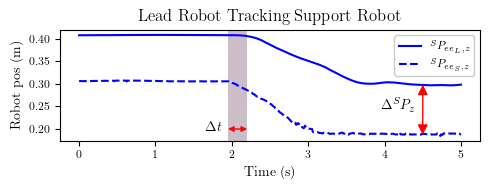

In [16]:
plt.figure(figsize=(5,2))

end_time = 5
cropped_ind = np.asarray(time <= end_time).nonzero()
time = time[cropped_ind]
lead_pos = lead_pos[cropped_ind]
bottle_pos_in_lead_frame = bottle_pos_in_lead_frame[cropped_ind]

plt.plot(time, lead_pos[:,0], color='b', label=r'$^{S} P_{ee_{L},z}$')
plt.plot(time, bottle_pos_in_lead_frame[:,0], color='b', linestyle='--', label=r'$^{S} P_{ee_{S},z}$')

# time offset
timestamps = [1.95, 2.2]
# for t in timestamps:
#     plt.axvline(t, color='k', linestyle='-', alpha=1)
ymin, ymax = plt.ylim()
plt.ylim((ymin,ymax))
#d2c295ff for alternate yellow
#175e54ff for green
plt.fill_between(time, ymin, ymax, where=((time >= timestamps[0]) & (time <= timestamps[1])),
                 alpha=0.3, facecolor='#53284f')
y_pos = 0.2
#8c1515 for alternate red
plt.annotate(text='', xy=(timestamps[0],y_pos), xytext=(timestamps[1],y_pos),
             arrowprops=dict(arrowstyle='<|-|>', shrinkA=0, shrinkB=0, mutation_scale=8, color='r'))
plt.text(timestamps[0]-0.3, y_pos*0.98, r'$\Delta t$')

# spatial offset
timestamp = 4.5
plt.annotate(text='', xy=(timestamp,bottle_pos_in_lead_frame[-1,0]), xytext=(timestamp,lead_pos[-1,0]),
             arrowprops=dict(arrowstyle='<|-|>', shrinkA=0, shrinkB=0, mutation_scale=15, color='r'))
plt.text(timestamp-0.55, (lead_pos[-1,0] + bottle_pos_in_lead_frame[-1,0])/2, r'$\Delta ^{S} P_z$')

plt.xlabel('Time (s)')
plt.ylabel('Robot pos (m)')
plt.title('Lead Robot Tracking Support Robot')
plt.legend(framealpha=1)
plt.tight_layout()

plt.savefig('./data/plots/position_tracking.svg', format='svg', dpi=1200)
plt.show()

free space orientation tracking

In [17]:
bottle_ori_in_optitrack_frame = R.from_quat(bottle_ori)
# R_bottle_ori_in_lead_frame = R_optitrack_in_support_frame.apply(R_support_in_lead_frame)
# R_bottle_ori_in_lead_frame = R_support_in_lead_frame.apply(bottle_ori_in_optitrack_frame[0])

# Haptic 2 arm (non-rigid grasp)

In [18]:
with open('./data/2arm_cap_14dec_06_00_sc7_tk6', 'rb') as f:
    clean_lines = (line.replace(b',',b'').replace(b'[',b'').replace(b']',b'') for line in f)
#     data = np.genfromtxt(clean_lines, dtype=float, delimiter=None, skip_header=4002, skip_footer=10500)
    data = np.genfromtxt(clean_lines, dtype=float, delimiter=None, skip_header=3202, skip_footer=10000)
    
n_rows, n_cols = np.shape(data)
time = data[:,0]
time -= min(time)
haptic_gripper_pos = data[:,1]
haptic_ori = np.zeros((n_rows,3,3))
haptic_control_on = data[:,11]
ee_force = data[:,12:15]
ee_moment = data[:,15:18]
ee_ori = np.zeros((n_rows,3,3))
ee_pos = data[:,27:30]
ee_pose_num_des = data[:,30]

ee_omega = np.zeros((n_rows,3))
ee_vel = np.zeros((n_rows,3))

for i in range(n_rows):
    haptic_ori[i] = np.vstack((data[i,2:5], data[i,5:8], data[i,8:11]))
    ee_ori[i] = np.vstack((data[i,18:21], data[i,21:24], data[i,24:27]))
    
    # express ee_force and ee_moment in ee frame (not robot base frame)
    ee_force[i] = ee_ori[i].transpose() @ ee_force[i]
    ee_moment[i] = ee_ori[i].transpose() @ ee_moment[i]
    
    # compute ee linear and angular velocities
    if i == 0:
        dR = (ee_ori[1] - ee_ori[0]) / (time[1] - time[0])
        ee_vel[0] = (ee_pos[1] - ee_pos[0]) / (time[1] - time[0])
    elif i == n_rows - 1:
        dR = (ee_ori[-1] - ee_ori[-2]) / (time[-1] - time[-2])
        ee_vel[-1] = (ee_pos[-1] - ee_pos[-2]) / (time[-1] - time[-2])
    else:
        dR = (ee_ori[i+1] - ee_ori[i-1]) / (time[i+1] - time[i-1])
        ee_vel[i] = (ee_pos[i+1] - ee_pos[i-1]) / (time[i+1] - time[i-1])
    
    skew_angularvelocity = ee_ori[i].transpose().dot(dR)
    ee_omega[i,0] = skew_angularvelocity[2,1]
    ee_omega[i,1] = skew_angularvelocity[0,2]
    ee_omega[i,2] = skew_angularvelocity[1,0]

In [19]:
# filter velocities, forces, and moments
alpha = 1/100
beta = 1 - alpha
ee_force_ema = np.zeros((n_rows,3))
ee_force_emv = np.zeros((n_rows,3))
ee_moment_ema = np.zeros((n_rows,3))
ee_moment_emv = np.zeros((n_rows,3))
ee_omega_ema = np.zeros((n_rows,3))
ee_omega_emv = np.zeros((n_rows,3))
ee_vel_ema = np.zeros((n_rows,3))
ee_vel_emv = np.zeros((n_rows,3))
for i in range(n_rows-1):
    ee_force_ema[i+1] = alpha*ee_force[i] + beta*ee_force_ema[i]
    ee_force_emv[i+1] = beta*(ee_force_emv[i] + alpha*(ee_force[i+1] - ee_force_ema[i])**2)
    
    ee_moment_ema[i+1] = alpha*ee_moment[i] + beta*ee_moment_ema[i]
    ee_moment_emv[i+1] = beta*(ee_moment_emv[i] + alpha*(ee_moment[i+1] - ee_moment_ema[i])**2)
    
    ee_omega_ema[i+1] = alpha*ee_omega[i] + beta*ee_omega_ema[i]
    ee_omega_emv[i+1] = beta*(ee_omega_emv[i] + alpha*(ee_omega[i+1] - ee_omega_ema[i])**2)
    
    ee_vel_ema[i+1] = alpha*ee_vel[i] + beta*ee_vel_ema[i]
    ee_vel_emv[i+1] = beta*(ee_vel_emv[i] + alpha*(ee_vel[i+1] - ee_vel_ema[i])**2)
    
ee_moment_ema[:,0] *= 5
ee_moment_ema[:,1] *= -10
ee_moment_ema[:,2] *= -3

# swap y and z
ee_moment_ema[:,[2,1]] = ee_moment_ema[:,[1,2]]

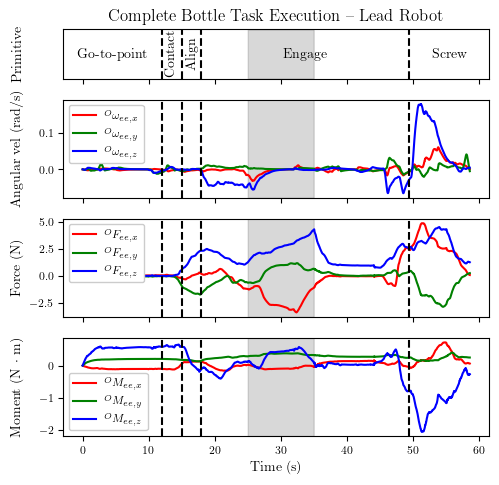

In [20]:
n_plots = 4
fig, axs = plt.subplots(n_plots, 1, sharex=True, figsize=(5,4.6),
                        gridspec_kw={'height_ratios': [0.5, 1, 1, 1]})

# color x,y,z as rgb with labels
color_list = ['r', 'g', 'b']
omega_labels = [r'$^{O} \omega_{ee,x}$',
                r'$^{O} \omega_{ee,y}$',
                r'$^{O} \omega_{ee,z}$']
force_labels = [r'$^{O} F_{ee,x}$',
                r'$^{O} F_{ee,y}$',
                r'$^{O} F_{ee,z}$']
moment_labels = [r'$^{O} M_{ee,x}$',
                 r'$^{O} M_{ee,y}$',
                 r'$^{O} M_{ee,z}$']
for i, color in enumerate(color_list):
#     axs[0].plot(time, ee_omega[:,i], color=color, alpha=0.2)
#     axs[1].plot(time, ee_force[:,i], color=color, alpha=0.2)
#     axs[2].plot(time, ee_moment[:,i], color=color, alpha=0.2)
    
    axs[1].plot(time, ee_omega_ema[:,i], color=color, label=omega_labels[i])
    axs[2].plot(time, ee_force_ema[:,i], color=color, label=force_labels[i])
    axs[3].plot(time, ee_moment_ema[:,i], color=color, label=moment_labels[i])
    
y_labels = ["Primitive", "Angular vel (rad/s)", "Force (N)", r"Moment (N $\cdot$ m)"]
primitive_timestamps = [12, 15, 18, 49.5]
for i in range(n_plots):
    # set y labels
    axs[i].set_ylabel(y_labels[i])
    
    # highlight regrasp area
    ymin, ymax = axs[i].get_ylim()
    axs[i].set_ylim((ymin,ymax))
    axs[i].fill_between(time, ymin, ymax, where=((time>=25) & (time<=35)),
                   alpha=0.3, color='#808080ff')
    
    # split primitives
    for t in primitive_timestamps:
        axs[i].axvline(t, color='k', linestyle='--')

    # create legends
    if i == 0:
        continue
    elif i == 3:
        axs[i].legend(loc='lower left', framealpha=1)
    else:
        axs[i].legend(loc='upper left', framealpha=1)
        
# label primitives
primitive_labels = ["Go-to-point", "Contact", "Align", "Engage", "Screw"]
primitive_label_rotations = ['horizontal', 'vertical', 'vertical', 'horizontal', 'horizontal']
# primitive_labels = ["A", "B", "C", "D", "E"]
xmin, xmax = axs[0].get_xlim()
for i in range(len(primitive_timestamps)):
    if i == 0:
        axs[0].text((xmin + primitive_timestamps[i])/2, 0.5, primitive_labels[i],
                    va='center', ha='center', rotation=primitive_label_rotations[i])
    if i == len(primitive_timestamps)-1:
        axs[0].text((xmax + primitive_timestamps[i])/2, 0.5, primitive_labels[i+1],
                    va='center', ha='center', rotation=primitive_label_rotations[i+1])
    else:
        axs[0].text((primitive_timestamps[i+1] + primitive_timestamps[i])/2, 0.5, primitive_labels[i+1],
                    va='center', ha='center', rotation=primitive_label_rotations[i+1])
    
fig.align_ylabels()
fig.tight_layout()

axs[0].set_yticks([])
axs[0].set_title("Complete Bottle Task Execution -- Lead Robot")
plt.xlabel("Time (s)")

plt.savefig('./data/plots/complete_task.svg', format='svg', dpi=1200)
plt.show()

In [21]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(8,6))
color_list = ['r', 'g', 'b']
for i, color in enumerate(color_list):
#     axs[0].plot(time, ee_pos[:,i], color=color)
#     axs[1].plot(time, ee_vel[:,i], color=color)

    axs[0].plot(time, ee_omega[:,i], color=color, alpha=0.2)
    axs[1].plot(time, ee_force[:,i], color=color, alpha=0.2)
    axs[2].plot(time, ee_moment[:,i], color=color, alpha=0.2)
    
    axs[0].plot(time, ee_omega_ema[:,i], color=color)
    axs[1].plot(time, ee_force_ema[:,i], color=color)
    axs[2].plot(time, ee_moment_ema[:,i], color=color)


    
plt.xlabel('Time (s)')
fig.tight_layout()
# plt.show()

plt.close()

In [22]:
fig, axs = plt.subplots(3, 1)
color_list = ['r', 'g', 'b']
for i, color in enumerate(color_list):
    axs[0].plot(time, ee_vel[:,i], color=color)
    axs[1].plot(time, ee_vel_ema[:,i], color=color)
    axs[2].plot(time, ee_vel_emv[:,i], color=color)

fig.tight_layout()
# plt.show()

plt.close()

# Haptic 2 arm (fake take w/ rigid grasp)

In [23]:
with open('./data/2arm_bottle_Clyde_feb23_sc08_fktk2', 'rb') as f:
    clean_lines = (line.replace(b',',b'').replace(b'[',b'').replace(b']',b'') for line in f)
#     data = np.genfromtxt(clean_lines, dtype=float, delimiter=None, skip_header=1262, skip_footer=750)
    data = np.genfromtxt(clean_lines, dtype=float, delimiter=None, skip_header=1262, skip_footer=2)
    
n_rows, n_cols = np.shape(data)
time = data[:,0]
time -= min(time)
sensed_force = data[:,1:4]
sensed_torque = data[:,4:7]
haptic_pos = data[:,7:10]
haptic_ori = np.zeros((n_rows,3,3))
joint_pos = data[:,19:26]
haptic_gripper_state = data[:,26]
ee_force = data[:,27:30]
ee_moment = data[:,30:33]
ee_ori = np.zeros((n_rows,3,3))
ee_pos = data[:,42:45]

ee_omega = np.zeros((n_rows,3))
ee_vel = np.zeros((n_rows,3))

for i in range(n_rows):
    haptic_ori[i] = np.vstack((data[i,10:13], data[i,13:16], data[i,16:19]))
    ee_ori[i] = np.vstack((data[i,33:36], data[i,36:39], data[i,39:42]))
    
    # express ee_force and ee_moment in ee frame (not robot base frame)
    ee_force[i] = ee_ori[i].transpose() @ ee_force[i]
    ee_moment[i] = ee_ori[i].transpose() @ ee_moment[i]
    
    # compute ee linear and angular velocities
    if i == 0:
        dR = (ee_ori[1] - ee_ori[0]) / (time[1] - time[0])
        ee_vel[0] = (ee_pos[1] - ee_pos[0]) / (time[1] - time[0])
    elif i == n_rows - 1:
        dR = (ee_ori[-1] - ee_ori[-2]) / (time[-1] - time[-2])
        ee_vel[-1] = (ee_pos[-1] - ee_pos[-2]) / (time[-1] - time[-2])
    else:
        dR = (ee_ori[i+1] - ee_ori[i-1]) / (time[i+1] - time[i-1])
        ee_vel[i] = (ee_pos[i+1] - ee_pos[i-1]) / (time[i+1] - time[i-1])
    
    skew_angularvelocity = ee_ori[i].transpose().dot(dR)
    ee_omega[i,0] = skew_angularvelocity[2,1]
    ee_omega[i,1] = skew_angularvelocity[0,2]
    ee_omega[i,2] = skew_angularvelocity[1,0]

In [24]:
# ee_moment[:,1] -= ee_moment[0,1]

fig, axs = plt.subplots(3, 1, figsize=(8,6))
color_list = ['r', 'g', 'b']
for i, color in enumerate(color_list):
#     axs[0].plot(time, ee_pos[:,i], color=color)
#     axs[1].plot(time, ee_vel[:,i], color=color)
    axs[0].plot(time, ee_omega[:,i], color=color)
    axs[1].plot(time, ee_force[:,i], color=color)
    axs[2].plot(time, ee_moment[:,i], color=color)

fig.tight_layout()
# plt.show()

plt.close()

use fake take 1 for align

In [25]:
with open('./data/2arm_bottle_Clyde_feb23_sc08_fktk', 'rb') as f:
    clean_lines = (line.replace(b',',b'').replace(b'[',b'').replace(b']',b'') for line in f)
    data = np.genfromtxt(clean_lines, dtype=float, delimiter=None, skip_header=1602, skip_footer=2500)
    
n_rows, n_cols = np.shape(data)
time = data[:,0]
time -= min(time)
sensed_force = data[:,1:4]
sensed_torque = data[:,4:7]
haptic_pos = data[:,7:10]
haptic_ori = np.zeros((n_rows,3,3))
joint_pos = data[:,19:26]
haptic_gripper_state = data[:,26]
ee_force = data[:,27:30]
ee_moment = data[:,30:33]
ee_ori = np.zeros((n_rows,3,3))
ee_pos = data[:,42:45]

ee_omega = np.zeros((n_rows,3))
ee_vel = np.zeros((n_rows,3))

for i in range(n_rows):
    haptic_ori[i] = np.vstack((data[i,10:13], data[i,13:16], data[i,16:19]))
    ee_ori[i] = np.vstack((data[i,33:36], data[i,36:39], data[i,39:42]))
    
    # express ee_force and ee_moment in ee frame (not robot base frame)
    ee_force[i] = ee_ori[i].transpose() @ ee_force[i]
    ee_moment[i] = ee_ori[i].transpose() @ ee_moment[i]
    
    # compute ee linear and angular velocities
    if i == 0:
        dR = (ee_ori[1] - ee_ori[0]) / (time[1] - time[0])
        ee_vel[0] = (ee_pos[1] - ee_pos[0]) / (time[1] - time[0])
    elif i == n_rows - 1:
        dR = (ee_ori[-1] - ee_ori[-2]) / (time[-1] - time[-2])
        ee_vel[-1] = (ee_pos[-1] - ee_pos[-2]) / (time[-1] - time[-2])
    else:
        dR = (ee_ori[i+1] - ee_ori[i-1]) / (time[i+1] - time[i-1])
        ee_vel[i] = (ee_pos[i+1] - ee_pos[i-1]) / (time[i+1] - time[i-1])
    
    skew_angularvelocity = ee_ori[i].transpose().dot(dR)
    ee_omega[i,0] = skew_angularvelocity[2,1]
    ee_omega[i,1] = skew_angularvelocity[0,2]
    ee_omega[i,2] = skew_angularvelocity[1,0]

In [26]:
fig, axs = plt.subplots(5, 1)
color_list = ['r', 'g', 'b']
for i, color in enumerate(color_list):
    axs[0].plot(time, ee_pos[:,i], color=color)
    axs[1].plot(time, ee_vel[:,i], color=color)
    axs[2].plot(time, ee_omega[:,i], color=color)
    axs[3].plot(time, ee_force[:,i], color=color)
    axs[4].plot(time, ee_moment[:,i], color=color)

fig.tight_layout()
# plt.show()

plt.close()

In [27]:
# ee_moment[:,1] -= ee_moment[0,1]

fig, axs = plt.subplots(3, 1, figsize=(8,6))
color_list = ['r', 'g', 'b']
for i, color in enumerate(color_list):
#     axs[0].plot(time, ee_pos[:,i], color=color)
#     axs[1].plot(time, ee_vel[:,i], color=color)
    axs[0].plot(time, ee_omega[:,i], color=color)
    axs[1].plot(time, ee_force[:,i], color=color)
    axs[2].plot(time, ee_moment[:,i], color=color)

fig.tight_layout()
# plt.show()

plt.close()